In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 4)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 4)
model = ExtraTreesClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.909 (0.030)


In [3]:
X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 4)
model = ExtraTreesClassifier()
model.fit(X, y)
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [5]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features = 20, n_informative = 15, noise = 0.1, random_state = 3)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [12]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor

X, y = make_regression(n_samples = 1000, n_features = 20, n_informative = 15, noise = 0.1, random_state = 3)
model = ExtraTreesRegressor()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.517 (4.892)


In [13]:
X, y = make_regression(n_samples = 1000, n_features = 20, n_informative = 15, noise = 0.1, random_state = 3)
model = ExtraTreesRegressor()
model.fit(X, y)
row = [[-0.56996683,0.80144889,2.77523539,1.32554027,-1.44494378,-0.80834175,-0.84142896,0.57710245,0.96235932,-0.66303907,-1.13994112,0.49887995,1.40752035,-0.2995842,-0.05708706,-2.08701456,1.17768469,0.13474234,0.09518152,-0.07603207]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 53


>10 0.856 (0.036)
>50 0.897 (0.031)
>100 0.909 (0.028)
>500 0.913 (0.026)
>1000 0.913 (0.026)


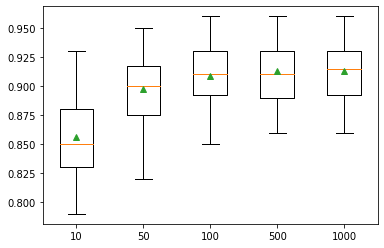

In [15]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

def get_dataset():
  X, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 4)
  return X, y 

def get_models():
  models = dict()
  n_trees = [10, 50, 100, 500, 1000] # la memoria no dio para correrlo con 5000 árboles 
  for n in n_trees:
    models[str(n)] = ExtraTreesClassifier(n_estimators = n)
  return models

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
	scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
	return scores

X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.896 (0.029)
>2 0.903 (0.029)
>3 0.907 (0.023)
>4 0.907 (0.028)
>5 0.910 (0.027)
>6 0.913 (0.020)
>7 0.906 (0.022)
>8 0.901 (0.029)
>9 0.910 (0.025)
>10 0.915 (0.025)
>11 0.907 (0.028)
>12 0.907 (0.025)
>13 0.908 (0.023)
>14 0.910 (0.024)
>15 0.906 (0.026)
>16 0.907 (0.023)
>17 0.907 (0.024)
>18 0.907 (0.025)
>19 0.909 (0.028)
>20 0.906 (0.034)


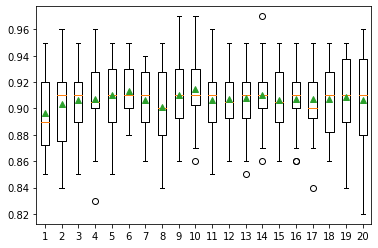

In [17]:
def get_models_2():
  models = dict()
  for i in range(1, 21):
    models[str(i)] = ExtraTreesClassifier(max_features = i)
  return models

X, y = get_dataset()
models = get_models_2()
results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>2 0.915 (0.024)
>3 0.908 (0.026)
>4 0.909 (0.025)
>5 0.902 (0.025)
>6 0.900 (0.027)
>7 0.905 (0.028)
>8 0.897 (0.025)
>9 0.901 (0.027)
>10 0.898 (0.025)
>11 0.891 (0.025)
>12 0.895 (0.025)
>13 0.893 (0.029)
>14 0.891 (0.024)


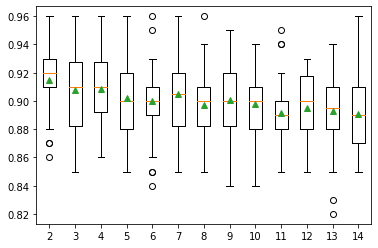

In [18]:
def get_models_3():
  models = dict()
  for i in range(2, 15):
    models[str(i)] = ExtraTreesClassifier(min_samples_split = i)
  return models

X, y = get_dataset()
models = get_models_3()
results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Comentarios del ejercicio
#### How to Develop an Extra Trees Ensemble with Python

El algoritmo de *Extra-Trees* es una alternativa al *Random Forest* en tanto utiliza una gran cantidad de árboles sin podar. Ambos algoritmos pueden llegar a tener un número alto de árboles de decisión, sin embargo, *Extra-Trees* utiliza todo el set de datos y no un subconjunto, además, elige *features* distintos antes de crear un nodo de decisión dentro de un árbol en lugar de escoger uno óptimo por medio de un algoritmo como lo hace *Random Forest*. Se puede utilizar igualmente para problemas de regresión y clasificación, y el resultado que arroja es un promedio o una mayoría según los resultados de todos los árboles. Existen tres hiperparámetros que se pueden ajustar con el algortimo *Extra-Trees* y son: el número de árboles de decisión, el número de inputs (*features*) para crear cada *split* o nodo de decisión y el número mínimo de *samples* que se necesitan en un nodo para crear un nodo de decisión.

# Comentarios sobre parámetros

El hiperparámetro del número de árboles puede consumir demasiados recursos si la cantidad es bastante elevada, sin embargo, no hace falta tener una cantidad muy alta para obtener buenos resultados (>90%). Según el tutorial, el hiperparámetro que se refiere al número de *features* para crear cada *split* es el más importante, sin embargo números bajos sugieren un rendimiento decente, esto como parte de las heurísticas que existen para este algoritmo y que lo diferencian del *Random Forest*. Lo mismo sucede para el último hiperparámetro, el cual sugiere que valores bajos pueden arrojar buenos resultados y que, incluso, un número alto puede empezar a empeorar los resultados de forma significativa.